# Task 5: Exploratory Data Analysis (EDA)

## Objective:
The goal of this task is to explore the Titanic dataset using both **statistical** and **visual techniques** to extract meaningful insights. EDA helps us understand the data’s structure, detect patterns, find anomalies, and prepare the data for machine learning.

## Tools Used:
- **Python Libraries**: `pandas`, `numpy`
- **Visualization**: `matplotlib`, `seaborn`

##  1. Initial Setup

### 1.1. Import necessary libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import plotly.express as px

### 1.2. Set default visualization styles

In [57]:
sns.set(style='whitegrid')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_palette('Set2')

## 2. Data Loading & First Look

### 2.1. Load the Titanic dataset

In [58]:
df = pd.read_csv('titanic.csv')

### 2.2. Preview data

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.3. Check for duplicate rows

In [64]:
df.duplicated().sum()

np.int64(0)

- 0 duplicate row

## 3. Missing Data Analysis
    
### 3.1. Visualize missing data

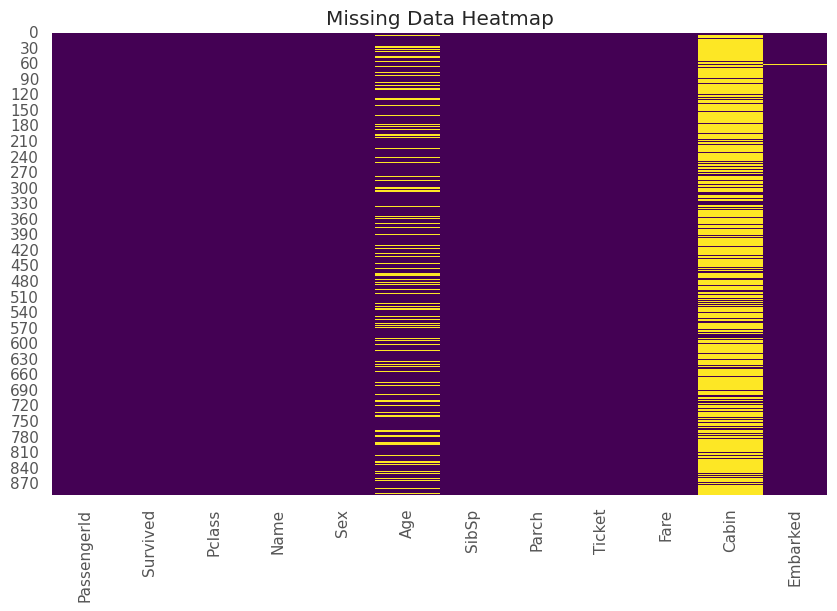

In [65]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

### 3.2. Check for missing data

In [66]:
df.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


- Cabin has 687 missing values
- Age has 177 mising values
- Embarked has 2 missing values

### 3.3. Define and apply imputation strategies

In [67]:
df.drop(columns = ['Cabin'], inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## 4. Feature Engineering

###4.1. Create derived features

- FamilySize = SibSp + Parch + 1 (the person themself)
- AgeGroup

In [68]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0,12,18,36,60,100],
    labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
)

### 4.2. Encode categorical variables

In [69]:
# Label Encoding 'Sex' (binary category) - Female - 0 & Male = 1
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


# One-Hot Encoding 'Embarked' and 'AgeGroup'
df = pd.get_dummies(df, columns=['Embarked', 'AgeGroup'], drop_first=False)

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Child,AgeGroup_Teen,AgeGroup_YoungAdult,AgeGroup_Adult,AgeGroup_Senior
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,False,False,True,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,True,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,False,False,True,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,False,False,True,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,False,False,True,False,False,True,False,False


##  5. Univariate Analysis

### 5.1. Analyze categorical features

In [71]:
def add_labels(ax):
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

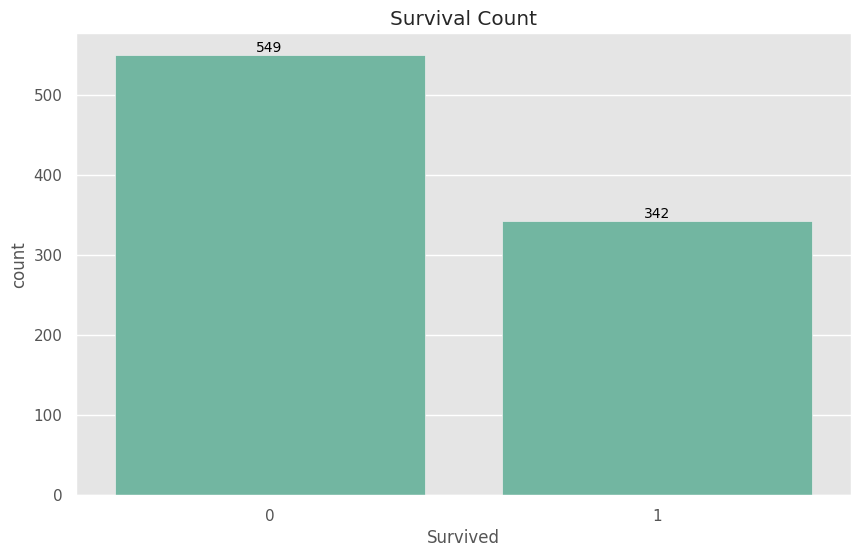

In [72]:
ax = sns.countplot(x='Survived', data=df)
add_labels(ax)
plt.title('Survival Count')
plt.show()

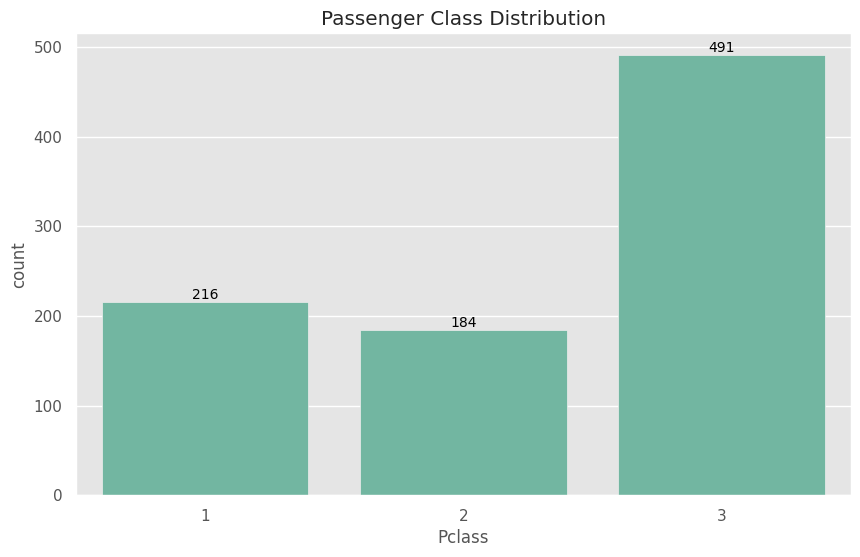

In [73]:
# Pclass count
ax = sns.countplot(x='Pclass', data=df)
add_labels(ax)
plt.title('Passenger Class Distribution')
plt.show()

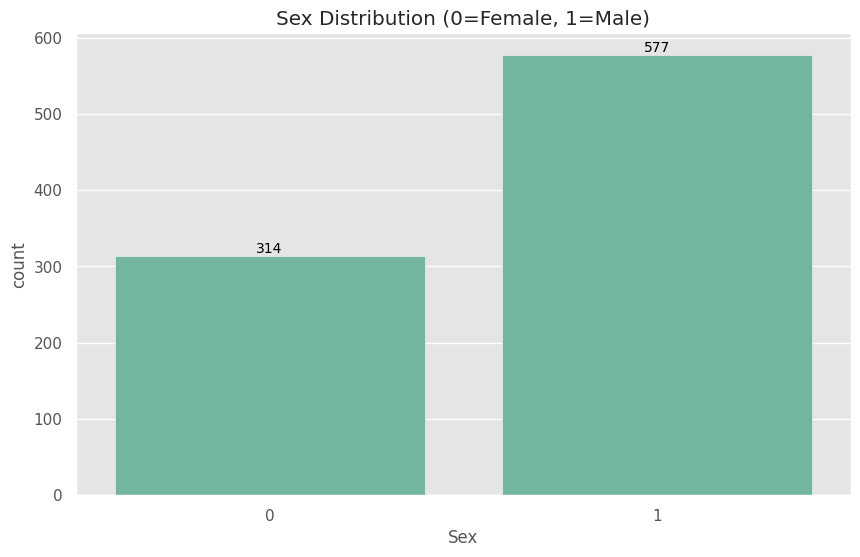

In [74]:
# Sex distribution
ax = sns.countplot(x='Sex', data=df)
add_labels(ax)
plt.title('Sex Distribution (0=Female, 1=Male)')
plt.show()

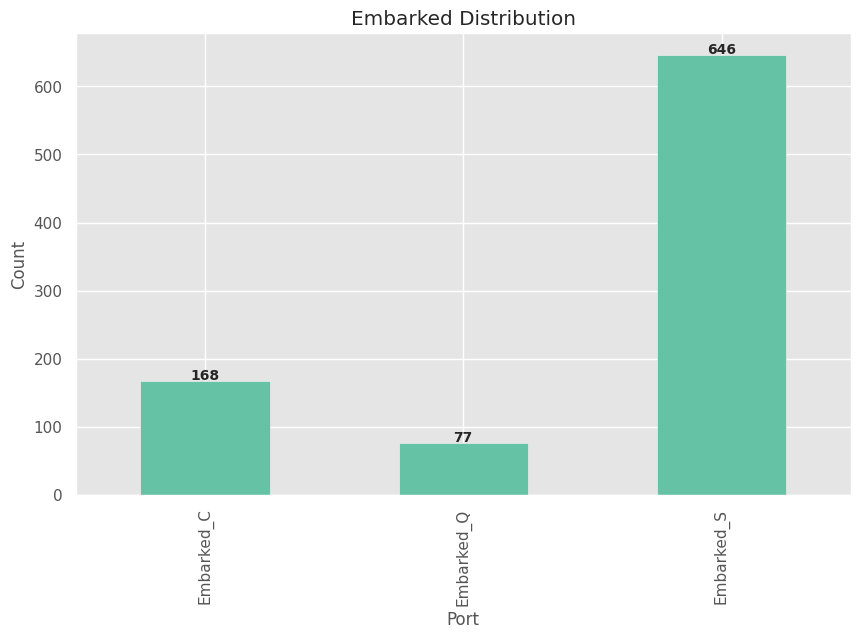

In [75]:
# Embarked (from one-hot columns)
embarked_cols = [col for col in df.columns if col.startswith('Embarked_')]
embarked_counts = df[embarked_cols].sum()

ax = embarked_counts.plot(kind='bar')
for i, v in enumerate(embarked_counts):
    ax.text(i, v + 2, str(int(v)), ha='center', fontweight='bold')
plt.title('Embarked Distribution')
plt.xlabel('Port')
plt.ylabel('Count')
plt.show()

### 5.2. Analyze numerical features

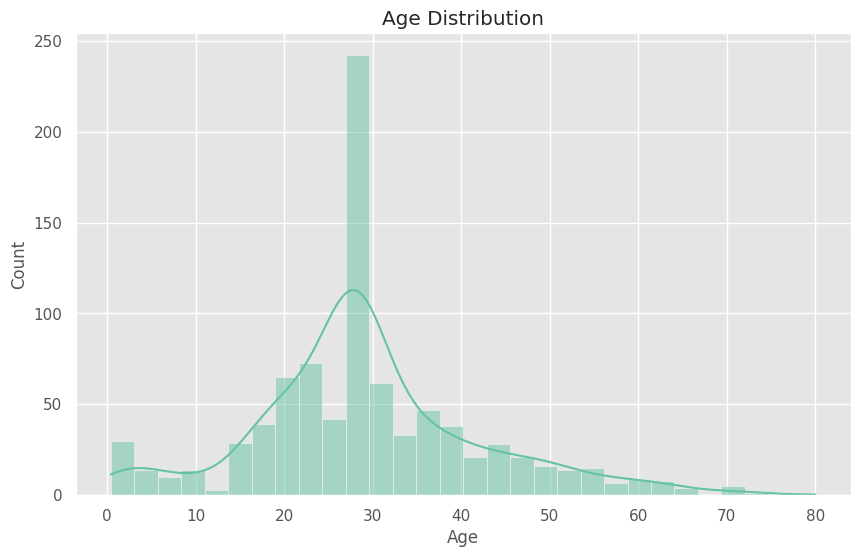

In [76]:
# Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

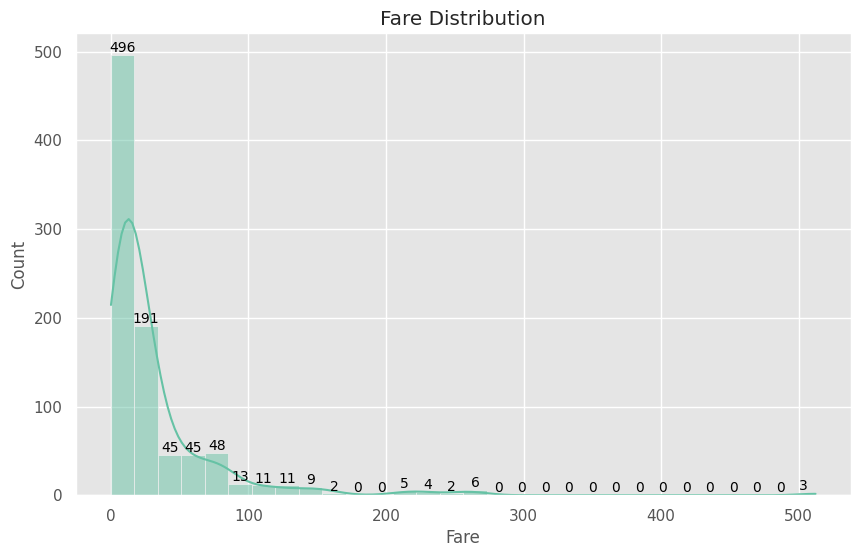

In [77]:
# Fare distribution
ax =sns.histplot(df['Fare'], bins=30, kde=True)
add_labels(ax)
plt.title('Fare Distribution')
plt.show()

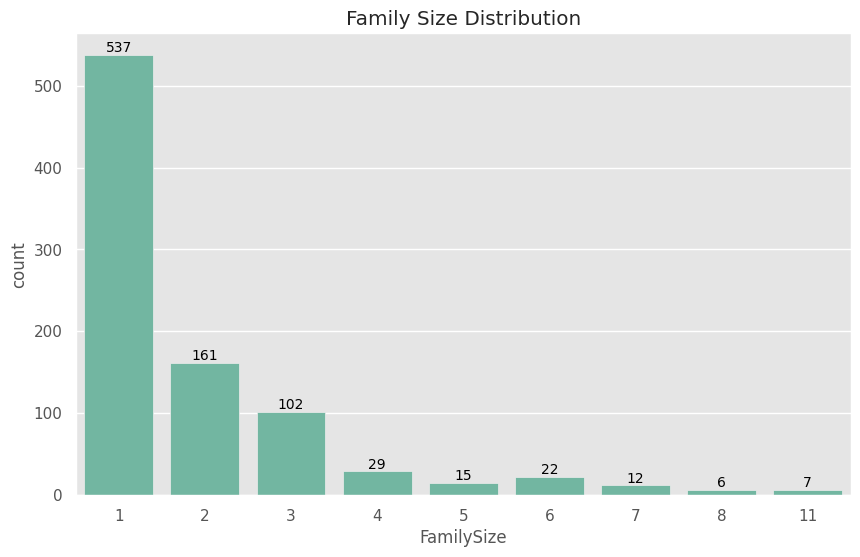

In [78]:
# FamilySize distribution (categorical-style)
ax = sns.countplot(x='FamilySize', data=df)
add_labels(ax)
plt.title('Family Size Distribution')
plt.show()

## 6. Bivariate Analysis
    
    
### 6.1. Explore survival relationships with other features

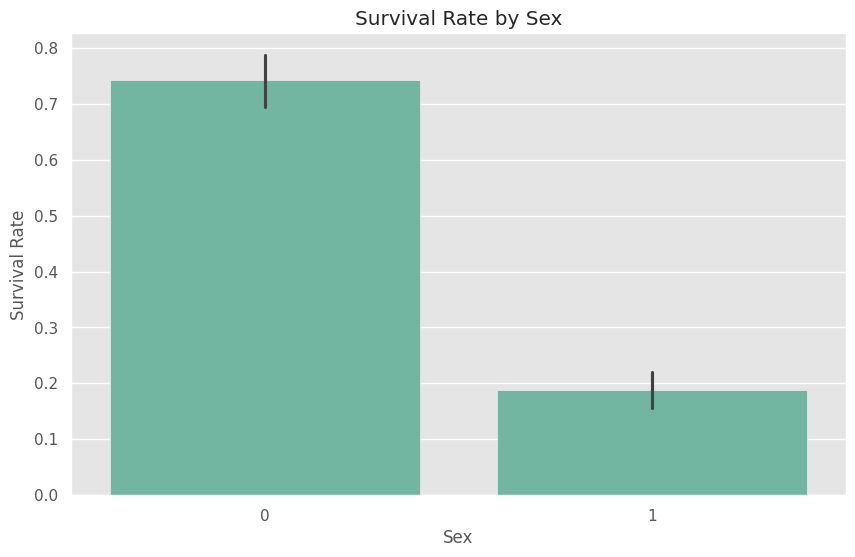

In [79]:
# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

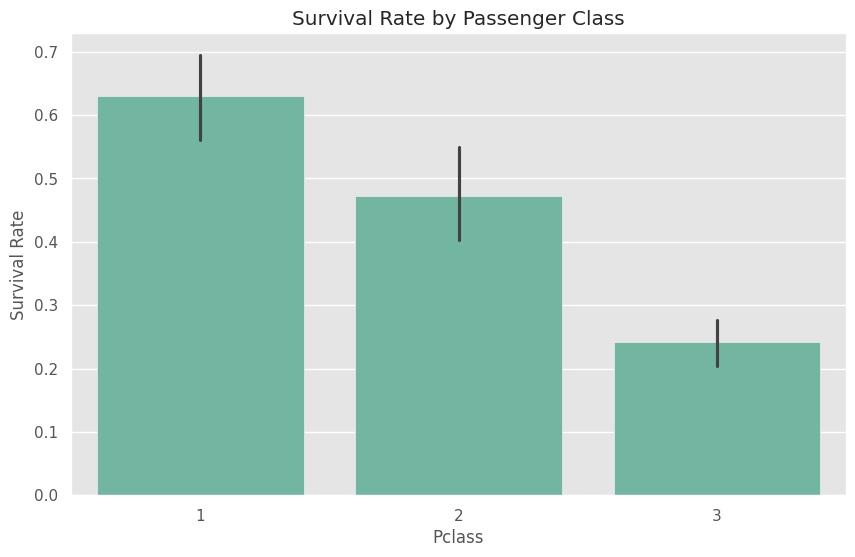

In [80]:
# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

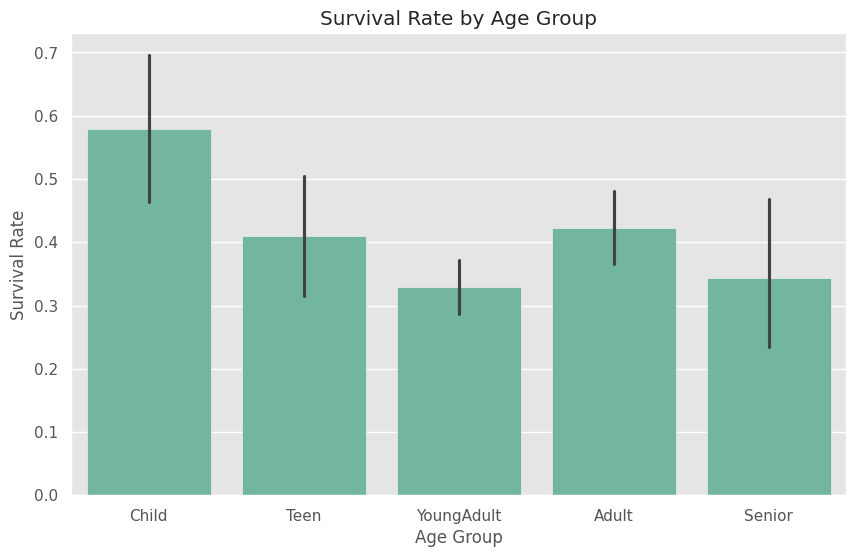

In [81]:
# Create AgeGroup from Age
bins = [0, 12, 19, 30, 50, 80]
labels = ['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Now plot survival rate by AgeGroup
sns.barplot(x='AgeGroup', y='Survived', data=df, order=labels)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show()


### 6.2. Use cross-tabulations and statistical tests

In [82]:
# Cross-tabulation: Survived vs Pclass
ct = pd.crosstab(df['Pclass'], df['Survived'])
chi2, p, dpf, expected = stats.chi2_contingency(ct)
print("Chi-Square Test for Pclass vs Survived")
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}\n")

Chi-Square Test for Pclass vs Survived
Chi2 = 102.89, p-value = 0.0000



- Passengers in 1st class were much more likely to survive.

In [83]:
# Cross-tabulation: Survived vs Sex
ct = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(ct)
print("Chi-Square Test for Sex vs Survived")
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}\n")

Chi-Square Test for Sex vs Survived
Chi2 = 260.72, p-value = 0.0000



- Females had a significantly higher survival rate than males

In [84]:
# Cross-tabulation: Survived vs Embarked (if available)
if 'Embarked_Q' in df.columns:
    df['Embarked'] = df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].idxmax(axis=1).str.replace('Embarked_', '')
    ct = pd.crosstab(df['Embarked'], df['Survived'])
    chi2, p, dof, expected = stats.chi2_contingency(ct)
    print("Chi-Square Test for Embarked vs Survived")
    print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi-Square Test for Embarked vs Survived
Chi2 = 25.96, p-value = 0.0000


## 7. Multivariate Analysis
    
    
### 7.1. Plot correlation heatmap of numeric features

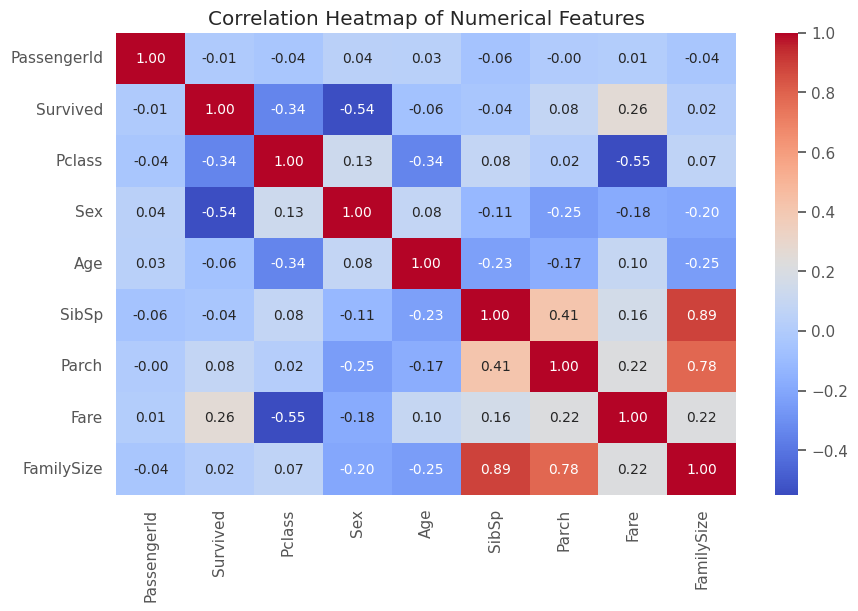

In [85]:
numeric_feature = df.select_dtypes(include='number')
corr_matrix = numeric_feature.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### 7.2 Generate Pairplots Colored by Survival Status

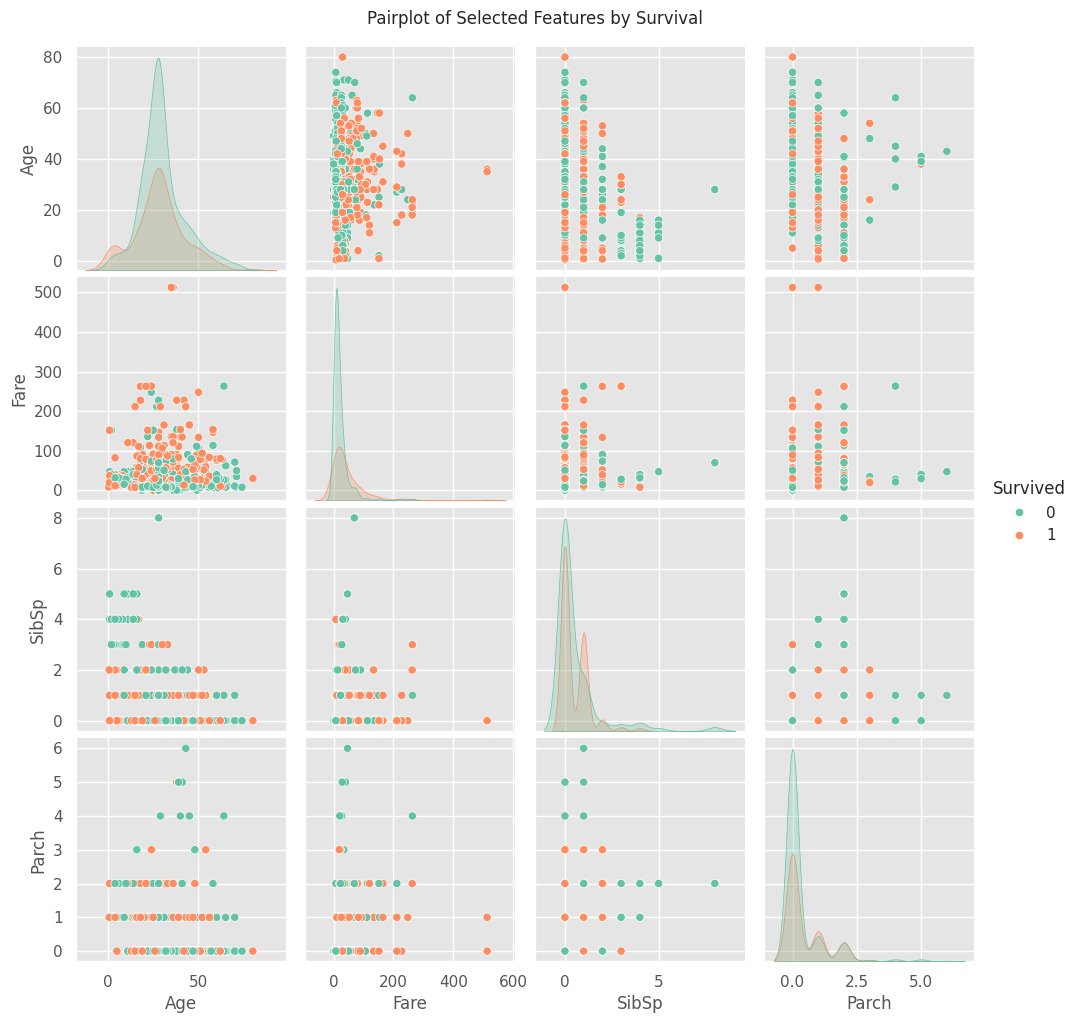

In [86]:
selected = ['Survived', 'Age', 'Fare', 'SibSp', 'Parch']
sns.pairplot(df[selected], hue='Survived', palette='Set2')
plt.suptitle('Pairplot of Selected Features by Survival', y=1.02)
plt.show()

### 7.3 Create Interaction Plots for Key Feature Pairs

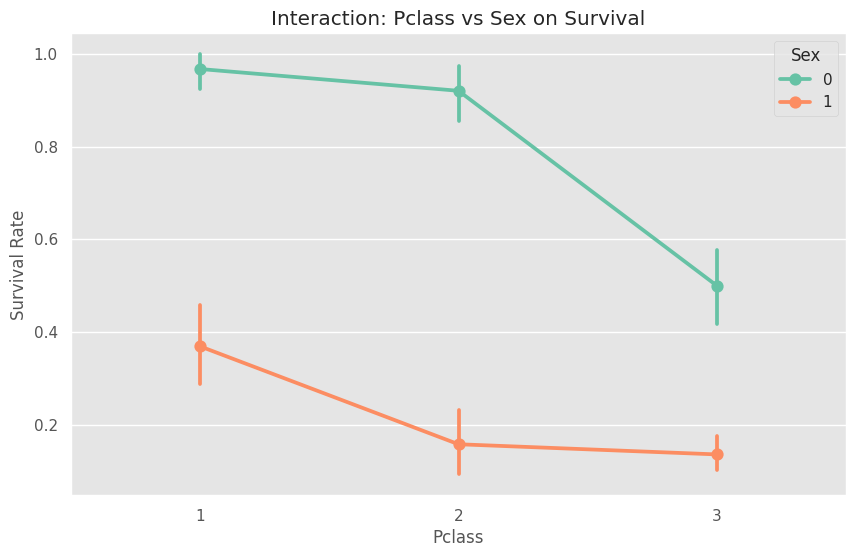

In [87]:
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='Set2')
plt.title('Interaction: Pclass vs Sex on Survival')
plt.ylabel('Survival Rate')
plt.show()

## 8. Advanced Visualizations

### 8.1 Use Faceted Grid Plots to Compare Subgroups

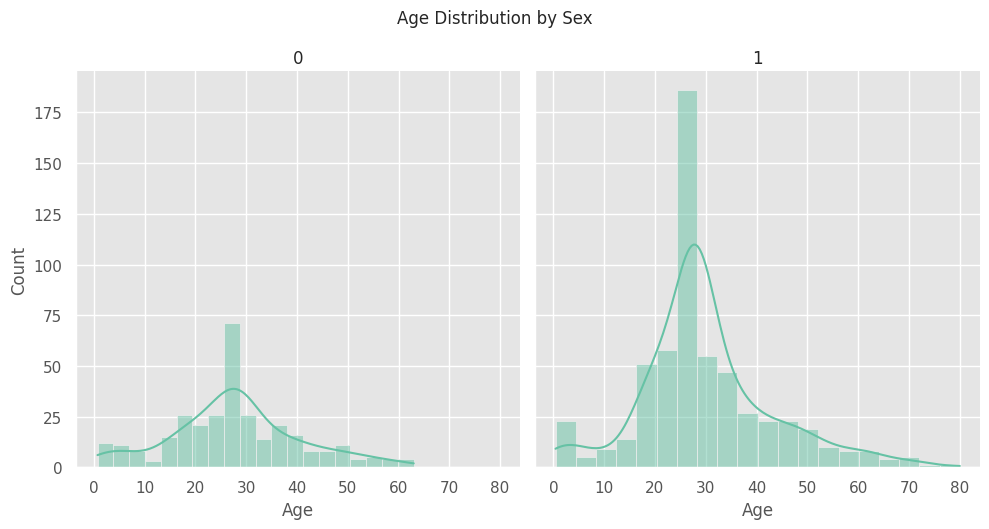

In [88]:
# Age vs Survival by Sex
g = sns.FacetGrid(df, col='Sex', height=5)
g.map(sns.histplot, 'Age', bins=20, kde=True)
g.set_titles('{col_name}')
g.fig.suptitle('Age Distribution by Sex', y=1.05)
plt.show()

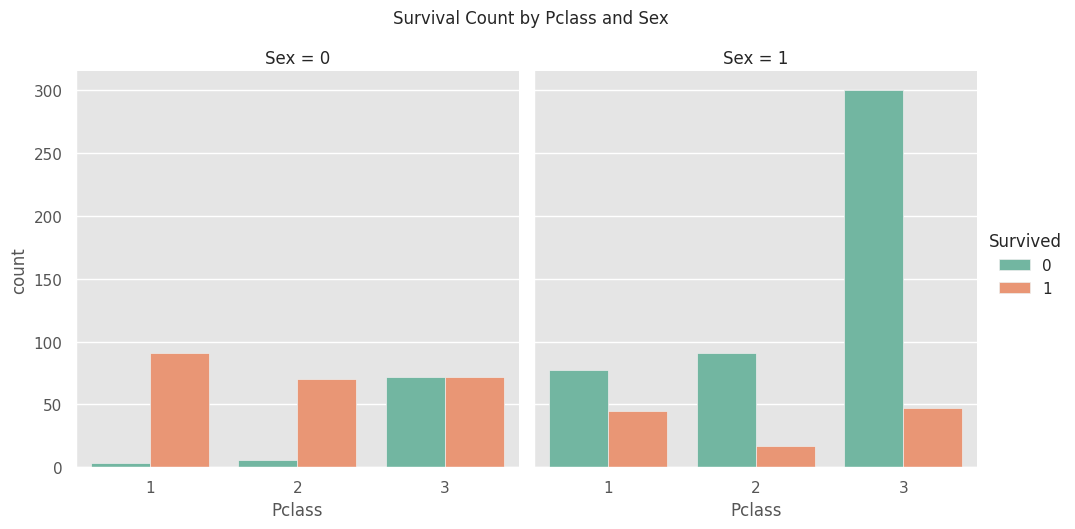

In [89]:
g = sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=df, palette='Set2')
g.fig.suptitle('Survival Count by Pclass and Sex', y=1.05)
plt.show()

### 8.2 Interactive Scatter Plot (Fare vs Age)

In [90]:
fig = px.scatter(df, x='Age', y='Fare', color='Survived',
                 hover_data=['Sex', 'Pclass'],
                 title='Interactive Plot: Age vs Fare colored by Survival')
fig.show()


## 9. Outlier Analysis

### 9.1 Detect and Visualize Outliers in Key Numerical Features

<ipython-input-91-91375ea86f10>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




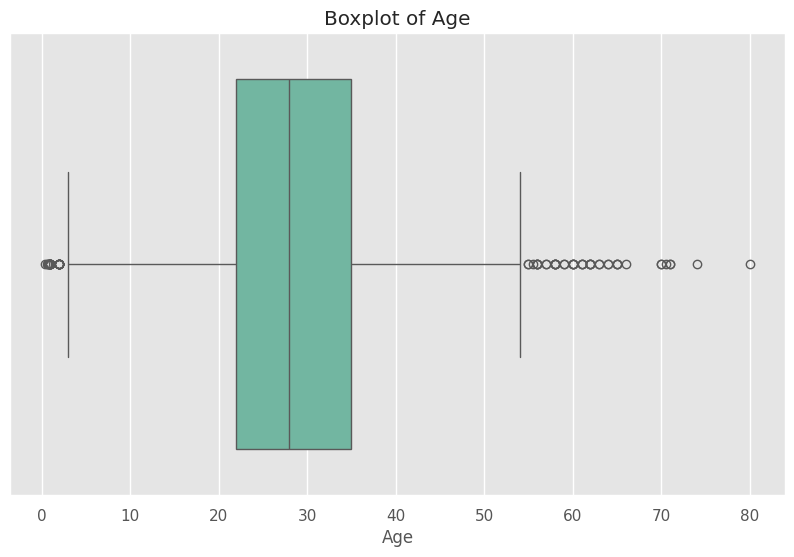

In [91]:
sns.boxplot(x='Age', data=df, palette='Set2')
plt.title('Boxplot of Age')
plt.show()

<ipython-input-92-f35a9749def6>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




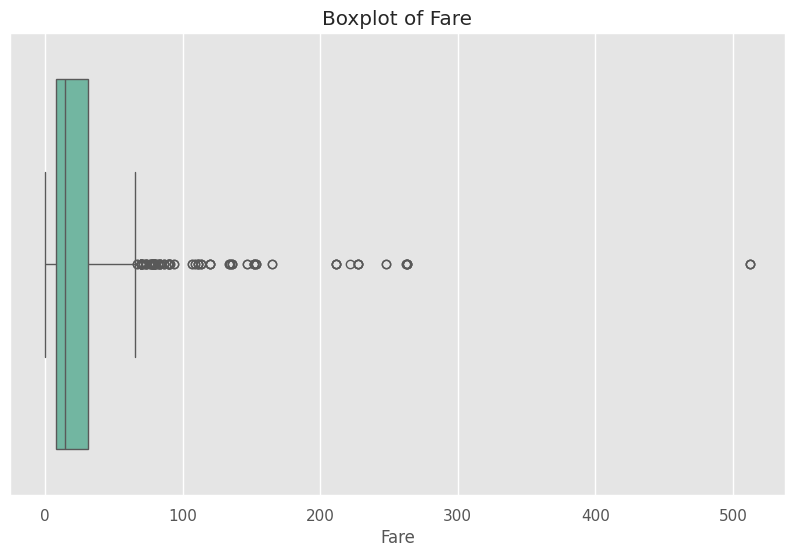

In [92]:
sns.boxplot(x='Fare', data=df, palette='Set2')
plt.title('Boxplot of Fare')
plt.show()

In [93]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Detect outliers
fare_outliers = detect_outliers_iqr(df, 'Fare')
age_outliers = detect_outliers_iqr(df, 'Age')

print(f"Outliers in Fare: {len(fare_outliers)}")
print(f"Outliers in Age: {len(age_outliers)}")


Outliers in Fare: 116
Outliers in Age: 66


### 9.2 Decide Whether to Keep, Remove, or Transform Outliers

In [94]:
df['Fare_log'] = np.log1p(df['Fare'])  # log(1 + x) avoids log(0) issue